<a href="https://colab.research.google.com/github/Pagadala-Ananya/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52046_DATA_ANALYSIS_USING_PYTHON_(LAB_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load the data**

In [2]:
import pandas as pd
data = pd.read_csv('DailyDelhiClimateTest.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.03509

**Q2: Visualize the time series**

<Axes: xlabel='date'>

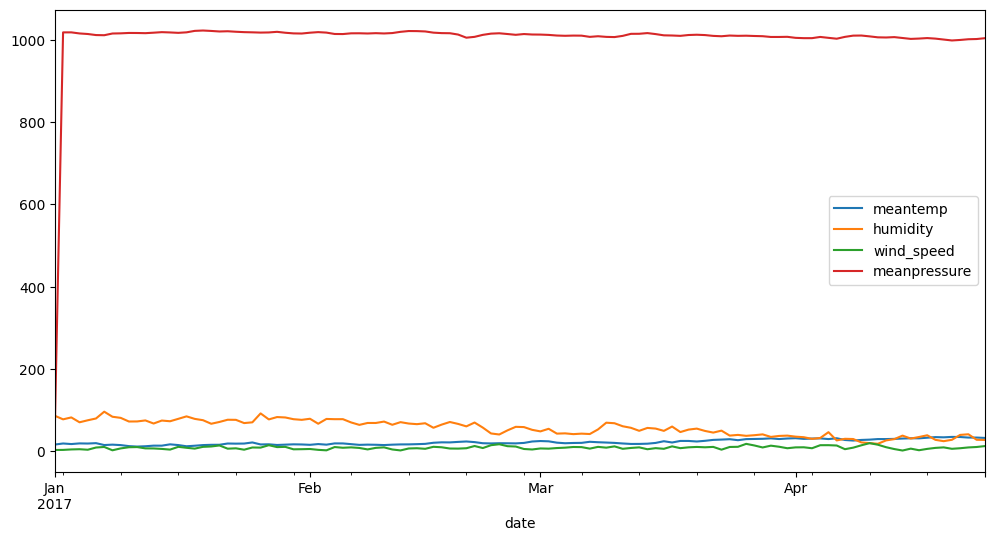

In [4]:
import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.plot(figsize=(12, 6))




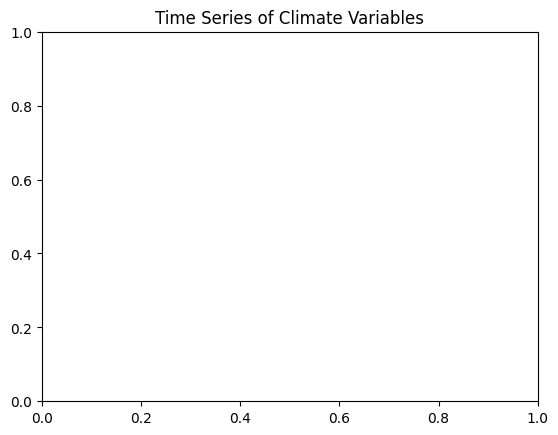

In [5]:
plt.title('Time Series of Climate Variables')
plt.show()

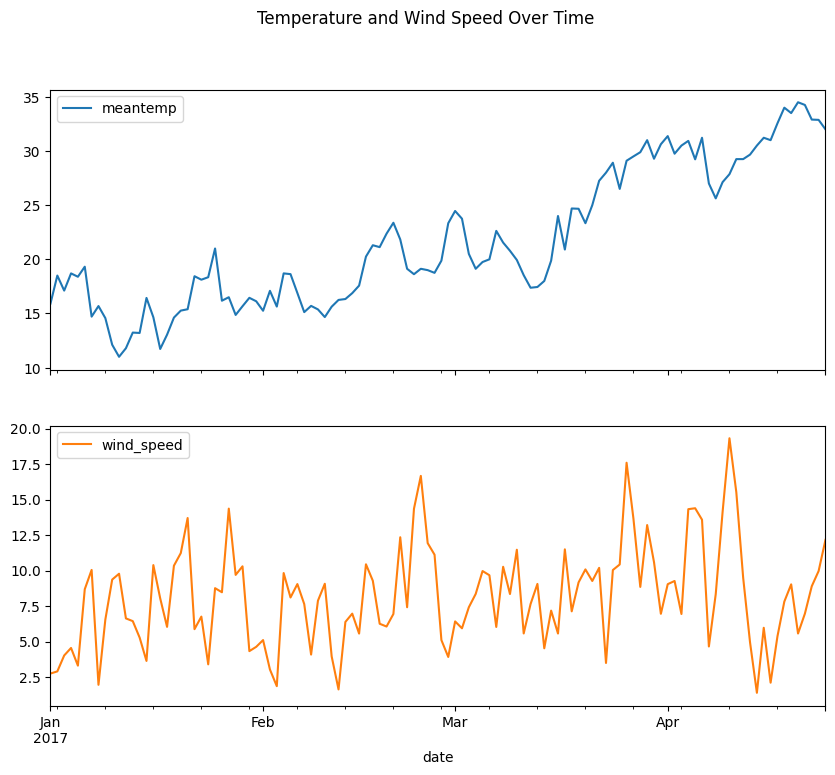

In [6]:
data[['meantemp', 'wind_speed']].plot(subplots=True, figsize=(10, 8), title="Temperature and Wind Speed Over Time")
plt.show()

**Q3: Analyze seasonal patterns and trends**

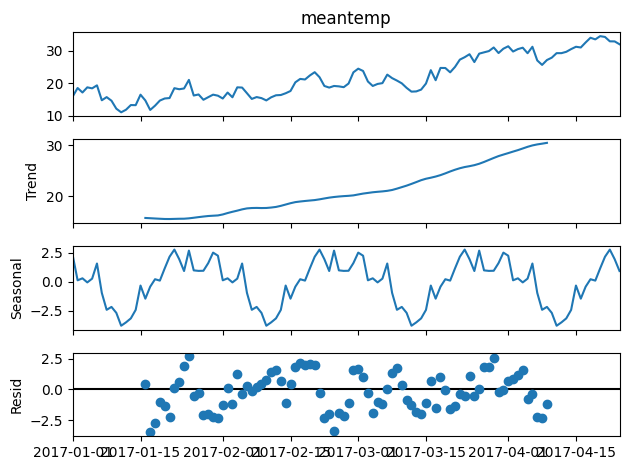

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['meantemp'], model='additive', period=30)
result.plot()
plt.show()

**Q4: Forecasting**

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
train_size = int(len(data) * 0.8)
train = data['meantemp'][:train_size]
test = data['meantemp'][train_size:]

In [9]:
model = ExponentialSmoothing(train, seasonal='additive', seasonal_periods=30).fit()
forecast = model.forecast(len(test))
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 2.46, RMSE: 2.78


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


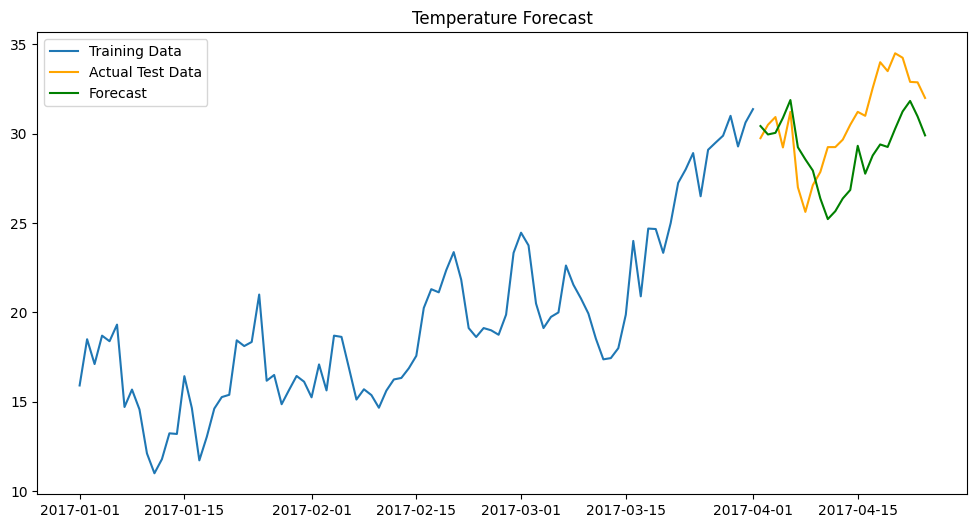

In [10]:
# Plot training, actual, and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.legend()
plt.title('Temperature Forecast')
plt.show()
